# ⚠️ Napomena

Ovaj materijal je **obrađen i izmenjen** u odnosu na original i služi kao pomoćni tekst.

Nije formalno verifikovan niti detaljno proveren na moguće greške, pa ga koristite **na sopstvenu odgovornost**.

# Uvod u neuronske mreže

McCulloch i Pitts (1943) su uveli pojednostavljen model neurona kao logičku jedinicu koja se aktivira kada zbir ulaznih signala pređe neki definisan prag odnosno definisanu granicu. Na osnovu te ideje, Rosenblatt je kasnije definisao **perceptron** i predložio algoritam koji automatski uči težine nad ulazima, kako bi se tačke podataka linearno razdvajale u dve klase.

## Perceptron

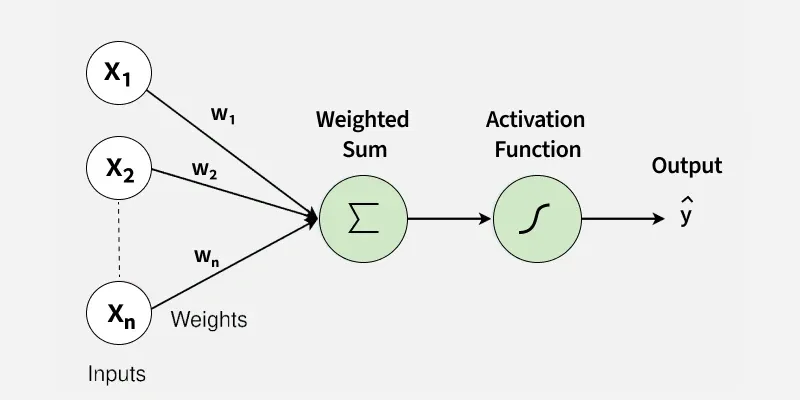

Perceptron je najjednostavniji model veštačkog neurona i linearni klasifikator: računa **težinsku sumu** ulaza i poredi je sa pragom. Formalno, za ulazni vektor **x** i težine **w** (uz bias **b**) izlaz je:

\begin{align}
z = \sum_{i=1}^{n} w_i x_i + b
\end{align}

Gde su:\
    * *z* - mrežni ulaz (engl. *net input*),\
    * $x_i$ su ulazi,\
    * $w_i$ su odgovarajuće težine povezane sa svakim ulazom,\
    * $b$ je bias, $b=-ϴ$ (bias = minus prag),\
    * $n$ je broj ulaza.

Zatim se primenjuje **funkcija odlučivanja** (step funkcija):

\begin{align}
\sigma(z) =
\begin{cases}
1 & \text{ako } z \ge 0, \\
0 & \text{ako } z < 0.
\end{cases}
\end{align}

##

Napomena: ako se koristi prag $\theta$, može se pisati $b = -\theta$, pa je okidanje ekvivalentno uslovu
\begin{align}
\sum_{i=1}^{n} w_i x_i \ge \theta.
\end{align}

Perceptron uči tako što iterativno menja težine na osnovu greške na trening primerima.

# Šta su $\mathbf{x}$, $\mathbf{w}$ i $b$ u perceptronu?

## 1) Šta je $\mathbf{x}$?

$\mathbf{x}$ je **vektor ulaza** (*input vector*).
To su brojevi (obeležja, atributi) koji opisuju objekat koji želiš da klasifikuješ.

**Primer (spam klasifikacija):** neuron odlučuje da li je email spam ($1$) ili nije spam ($0$).

| Osobina (feature) | Značenje                 | Vrednost |
|---|---|---:|
| $x_1$ | broj reči "free"           | 3   |
| $x_2$ | broj linkova               | 2   |
| $x_3$ | dužina poruke (karakteri)  | 120 |

Ulazni vektor:

\begin{align}
\mathbf{x} =
\begin{bmatrix}
3\\
2\\
120
\end{bmatrix}
\end{align}

Ovo je **"šta vidimo"** (opis podataka).

## 2) Šta je $\mathbf{w}$?

$\mathbf{w}$ je **vektor težina** (*weight vector*).
On kaže **koliko je svaka osobina bitna** za odluku.

Primer težina:

\begin{align}
\mathbf{w} =
\begin{bmatrix}
0.8\\
1.5\\
-0.01
\end{bmatrix}
\end{align}

Tumačenje:

| Težina | Značenje |
|---|---|
| $w_1 = 0.8$  | reč "free" snažno gura ka *spam* |
| $w_2 = 1.5$  | linkovi još jače guraju ka *spam* |
| $w_3 = -0.01$| duža poruka blago gura ka *nije spam* |

Ovo je **"šta je bitno"** (važnost atributa).

## 3) Šta je $b$ (bias)?

Ako je neuron definisan kao:

\begin{align}
z = \mathbf{w}^T\mathbf{x} + b
\end{align}

onda je $b$ **broj koji se dodaje nezavisno od ulaza**.

Intuitivno, $b$ možemo objasniti kao:
> „Koliko sam unapred sklon da kažem 1, čak i kad su svi ulazi nula?“

Ako je:

\begin{align}
\mathbf{x} =
\begin{bmatrix}
0\\
0\\
0
\end{bmatrix}
\end{align}

onda važi:

\begin{align}
z = b
\end{align}

Dakle, kada su ulazi nula, **bias sam određuje vrednost mrežnog ulaza** (i time utiče na odluku).

# Pravilo učenja perceptrona

Perceptron uči iterativno: inicijalizuje parametre, prolazi kroz trening primere, za svaki primer izračuna predikciju, uporedi je sa tačnom klasom i, ako je pogrešio, prilagodi težine i bias.

## 0) Inicijalizacija

Na početku se postavljaju:
- vektor težina $\mathbf{w}$ (npr. na nule ili male nasumične vrednosti),
- bias $b$ (takođe na 0 ili malu nasumičnu vrednost).

## 1) Računanje predikcije

Za i-ti trening primer imamo:
- ulazni vektor (atribute):

\begin{align}
\mathbf{x}_i = (x_i^1, x_i^2, \dots, x_i^n)
\end{align}

- tačnu oznaku klase:

\begin{align}
y_i \in \{0,1\}
\end{align}

Perceptron računa mrežni ulaz:

\begin{align}
z_i = \mathbf{w}^T \mathbf{x}_i + b
\end{align}

i zatim predikciju pomoću step funkcije:

\begin{align}
\hat{y}_i = \sigma(z_i)
\end{align}

## 2) Greška kao signal za učenje

Greška (razlika između istine i predikcije) je:

\begin{align}
e_i = y_i - \hat{y}_i
\end{align}

Moguća su tri slučaja:
- $e_i = 0$  → tačno, nema promena
- $e_i = 1$  → trebalo je 1, a predviđeno je 0
- $e_i = -1$ → trebalo je 0, a predviđeno je 1

## 3) Pravilo promene težina i biasa

Ažuriranje se vrši po sledećim pravilima (sa brzinom učenja $\eta \in (0,1]$):

\begin{align}
\Delta w_j = \eta (y_i - \hat{y}_i)\, x_i^j
\end{align}

\begin{align}
\Delta b = \eta (y_i - \hat{y}_i)
\end{align}

Zatim se parametri ažuriraju:

\begin{align}
w_j \leftarrow w_j + \Delta w_j,
\qquad
b \leftarrow b + \Delta b
\end{align}

## 4) Objašnjenja obeležja

- $\mathbf{x}_i$ je **ulazni vektor** i-tog trening primera, tj. skup svih atributa tog primera:
\begin{align}
\mathbf{x}_i = (x_i^1, x_i^2, \dots, x_i^n)
\end{align}

- $x_i^j$ je **j-ti atribut (feature)** i-tog trening primera, tj. j-ta komponenta vektora $\mathbf{x}_i$.
  Primer: ako je $x^2$ “broj linkova”, onda je $x_i^2$ broj linkova u i-tom emailu.

- $\mathbf{w}$ je **vektor težina** koji perceptron uči:
\begin{align}
\mathbf{w} = (w_1, w_2, \dots, w_n)
\end{align}

- $w_j$ je **težina vezana za j-ti atribut** $x^j$.
  Svaka težina $w_j$ direktno govori koliko atribut $x^j$ utiče na odluku.
  Za razliku od biasa, težine su vezane “jedan na jedan” za atribute iz skupa podataka.

- $b$ je **bias** (konstanta koja se dodaje nezavisno od ulaza).
  On pomera granicu odlučivanja i utiče na predikciju čak i kada su svi ulazi nula.

- $y_i$ je **tačna oznaka klase** i-tog trening primera (ground truth), npr. $0$ ili $1$.

- $\hat{y}_i$ je **predviđena oznaka klase** za i-ti primer, tj. izlaz perceptrona nakon primene $\sigma(\cdot)$.

- $\eta$ je **brzina učenja** (*learning rate*), obično konstanta između 0 i 1.
  Ona određuje **veličinu koraka** prilikom ažuriranja:
  - veće $\eta$ → veće promene težina (brže učenje, ali veći rizik “preskakanja” dobrog rešenja)
  - manje $\eta$ → manje promene (stabilnije, ali sporije učenje)



In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [22]:
# -------------------------------------------------------------------------- #
#                IMPLEMENTACIJA ALGORITMA PERCEPTRONA                        #
# -------------------------------------------------------------------------- #
class Perceptron:

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    # brzina ucenja, izmedju 0.0 i 1.0
    self.eta = float(eta)
    # max broj iteracija
    self.n_iter = int(n_iter)
    # random broj za inicijalizaciju tezine
    self.random_state = int(random_state)

  def fit(self, X, y):
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y)

    # rgen - generator nasumicnih brojeva
    rgen = np.random.RandomState(self.random_state)

    # Težine za svako obeležje + bias posebno
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]).astype(np.float64)
    self.b_ = 0.0
    self.errors_ = []

    for _ in range(self.n_iter):
    # while i <= self.n_iter:
      errors = 0
      for xi, target in zip(X, y):
        # OVDE JE PRIMENJEN GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA
        update = self.eta * (target - self.predict(xi))
        if update != 0.0:
          self.w_ += update * xi
          self.b_ += update
          errors += 1
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    X = np.asarray(X, dtype=np.float64)
    # racunanje net ulaza
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    # granicna funkcija
    return np.where(self.net_input(X) >= 0.0, 1, 0)

# Testiranje algoritma nad skupom podataka *Iris*

Ovo je jedan od prvih skupova podataka iz literature koji se koristi za tetiranje klasifikacionih algoritama. Skup podataka sadrži 3 klase sa po 50 uzoraka. Svaki uzorak/primer je biljka. Klase biljaka predstavljaju podvrstu cveta iris: setosa, versicolor i virginica. Svaki uzorak opisan je sa 4 obeležja (dužina i širina čašičnog lista i dužina i širina latice) i označen je kojoj klasi pripada. Nema nedostajućih podataka.

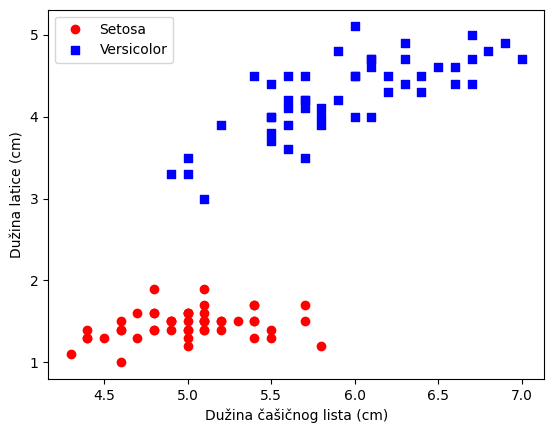

In [23]:
# -------------------------------------------------------------------------- #
#                       PRIKAZIVANJE PODATAKA                                #
# -------------------------------------------------------------------------- #

import ssl
import urllib.request

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

try:
    import certifi
    ctx = ssl.create_default_context(cafile=certifi.where())
except Exception:
    ctx = ssl._create_unverified_context()

with urllib.request.urlopen(s, context=ctx) as resp:
    df = pd.read_csv(resp, header=None, encoding='utf-8')

# dve klase: setosa i versicolor (prvih 100 uzoraka)
# trebaju nam dve klase a ne tri, zbog toga cemo samo uzeti prvih 100 uzoraka
# prvih 50 se odnose na setosu a drugih 50 na versicolor
# 0 stavljamo za setesu, za ostale (versicolor) 1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

'''Pred nama se postavlja zadatak da obučimo model koji će biti u mogućnosti sam
da razlikuje/klasifikuje vrstu cveta na osnovu 4 ulazne vrednosti dužina,
širina lista, dužina i širina latice. Da bi to uradili prvo smo odabrali podatke
za obuku. To su parovi odgvarajucih ulaznih obilezija i odgovarajućih klasa cveta
(izlaza). Ti podaci koriste se da bi percepton naucio kako da klasifikuje.
Od ukupnog skupa odabrano je 80% podataka za obuku i 20% za testiranje.'''

# uzimamo samo dva obeležja za prikazivanje: dužina čašičnog lista (prva kolona) i dužina latice (treća kolona), za prve dve klase
X = df.iloc[0:100, [0, 2]].values.astype(np.float64)

# prikazivanje uzoraka u prostoru obeležja
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Dužina čašičnog lista (cm)')
plt.ylabel('Dužina latice (cm)')
plt.legend(loc='upper left')
plt.show()


Tačnost na test skupu: 100.00%


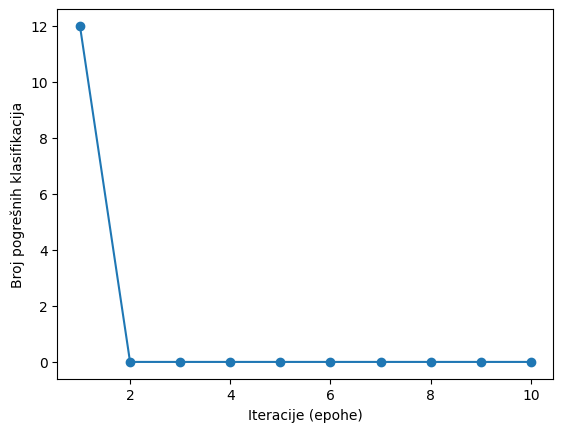

In [24]:
# -------------------------------------------------------------------------- #
#                        OBUCAVANJE PERCEPTRONA                              #
# -------------------------------------------------------------------------- #

# Podela na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treniranje perceptrona
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X_train, y_train)

# Evaluacija modela (na test skupu)
y_pred = ppn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Tačnost na test skupu: {accuracy * 100:.2f}%")

# prikaz greske kroz iteracije/epohe
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteracije (epohe)')
plt.ylabel('Broj pogrešnih klasifikacija')
plt.show()

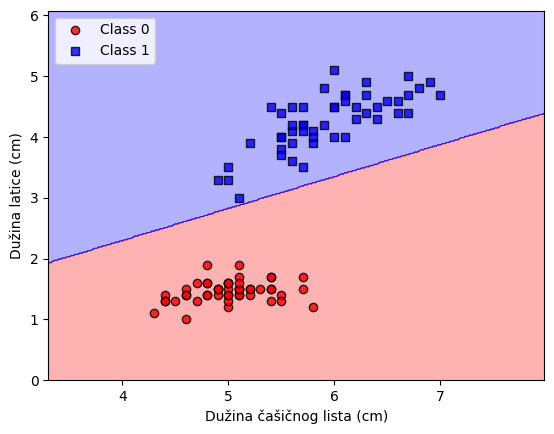

In [25]:
# -------------------------------------------------------------------------- #
#                   ISCRTAVANJE GRANICE ODLUCIVANJA                          #
# -------------------------------------------------------------------------- #

def plot_decision_regions(X, y, classifier, resolution=0.02):
    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y)

    markers = ('o', 's', 'v', '<', '>', '^')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'purple', 'pink']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # odredjivanje min i max vrednosti atributa za kreiranje para grid nizova xx1 i xx2
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    grid = np.c_[xx1.ravel(), xx2.ravel()]
    # predvidjanje oznaka klasa
    lab = classifier.predict(grid).reshape(xx1.shape)

    # prikazivanje kontura između klasa
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Dužina čašičnog lista (cm)')
plt.ylabel('Dužina latice (cm)')
plt.legend(loc='upper left')
plt.show()

# Prilagodljivi linearni neuroni (ADALINE) i minimizacija gubitka gradijentnim spustom

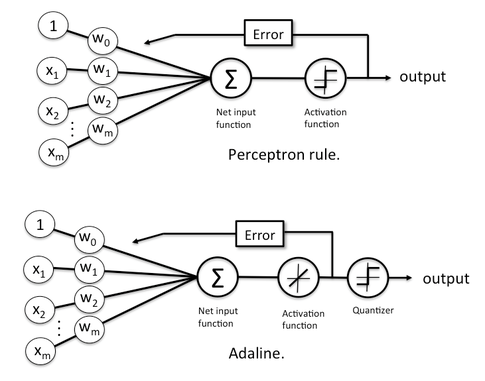

ADALINE (*Adaptive Linear Neuron*, Widrow i Hoff, 1960) je modifikacija perceptrona kod koje se tokom učenja ne koristi step funkcija, već **linearna aktivacija**. Ideja je da se učenje zasniva na realnoj vrednosti izlaza, pa možemo da definišemo „lepu“ funkciju gubitka i da je minimizujemo standardnim optimizacionim postupkom.

Perceptron najpre „iseče“ izlaz step funkcijom i dobije $\hat{y}\in\{0,1\}$, pa ažurira težine na osnovu te diskretne odluke. Kod ADALINE-a se prvo izračuna net ulaz:

\begin{align}
z_i = \mathbf{w}^T\mathbf{x}_i + b
\end{align}

a zatim se tokom učenja koristi **funkcija identiteta** (linearna aktivacija):

\begin{align}
\sigma(z_i) = z_i
\end{align}

Ona se zove „identitet“ jer ne menja vrednost: izlaz je isti broj kao ulaz $z_i$. Zbog toga je izlaz neurona tokom učenja **kontinualan** (realan, nije samo 0/1). Tek na kraju, za binarnu klasifikaciju, odluka se i dalje može dobiti step funkcijom nad $z$.

Prednost linearnog izlaza je što možemo da definišemo funkciju gubitka koja se menja postepeno i ima izvod, tj. **diferencijabilna je**. U ADALINE-u se tipično koristi srednja kvadratna greška (MSE):

\begin{align}
L(\mathbf{w},b)=\frac{1}{2n}\sum_{i=1}^{n}\left(y_i-\sigma(z_i)\right)^2
\end{align}

Pošto je ovde $\sigma(z_i)=z_i$, gubitak meri koliko je net ulaz (linearni izlaz) daleko od tačne oznake $y_i$. Faktor $\frac{1}{2}$ je tu iz praktičnih razloga (pojednostavljuje izvode), a $n$ je broj trening primera.

Za razliku od step funkcije, ovako definisan gubitak je **diferencijabilan**, pa možemo sistematski da tražimo parametre $\mathbf{w}, b$ koji ga minimizuju. Pošto je ovaj gubitak (za linearni model) i **konveksan**, nema „lažnih“ lokalnih minimuma: optimizacija (u idealnim uslovima) vodi ka jedinstvenom globalnom minimumu.

Minimizacija se radi metodom **gradijentnog spusta** (*gradient descent*): parametri se pomeraju u smeru suprotnom od gradijenta gubitka (jer gradijent pokazuje smer najvećeg rasta). Zato je pravilo ažuriranja:

\begin{align}
\Delta w_j = -\eta \nabla_{w_j} L(\mathbf{w},b)
\end{align}

\begin{align}
\Delta b = -\eta \nabla_{b} L(\mathbf{w},b)
\end{align}

gde je $\eta$ brzina učenja (veličina koraka). Tj. ako promena neke težine povećava gubitak, gradijent to „signalizira“, a mi idemo u suprotnom smeru da gubitak smanjimo. Ponavljanjem ovih koraka kroz više iteracija (epoha) ADALINE pronalazi težine i bias koji daju minimalnu vrednost funkcije gubitka.

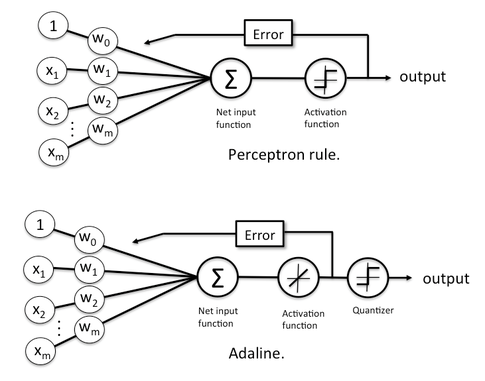

In [26]:
# -------------------------------------------------------------------------- #
#                   IMPLEMENTACIJA ADALINE ALGORITMA                         #
# -------------------------------------------------------------------------- #

class AdalineGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # brzina ucenja, izmedju 0.0 i 1.0
        self.eta = eta
        # broj iteracija
        self.n_iter = n_iter
        # random broj za inicijalizaciju tezine
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # rgen - generator nasumicnih brojeva
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            # OVDE JE PRIMENJEN GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA
            self.w_ += self.eta * 2.0 * X.T.dot(errors)/X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        # racunanje net ulaza
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        # granicna funkcija
        return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)


# Testiranje algoritma nad skupom podataka *Iris*

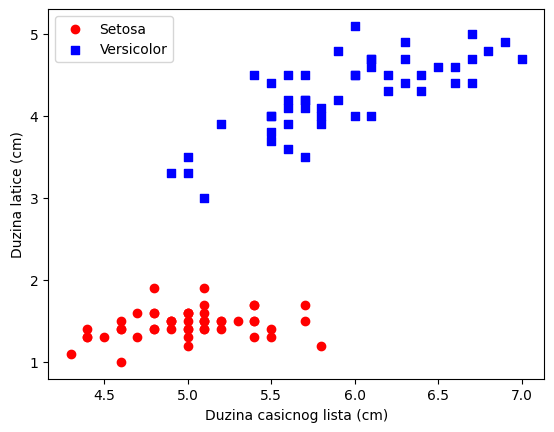

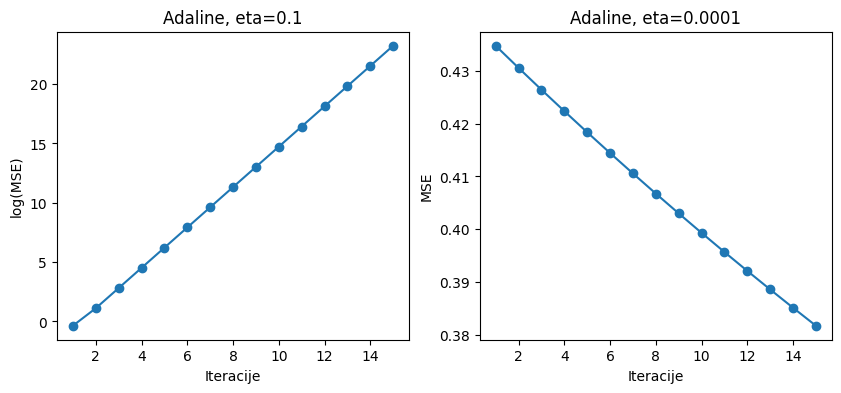

Text(0.5, 1.0, 'Adaline - gradijentni spust')

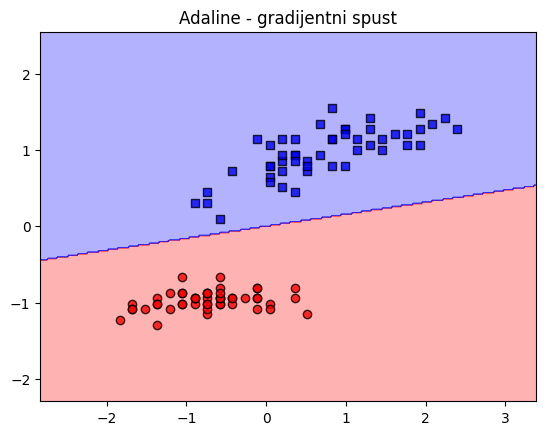

In [27]:
# -------------------------------------------------------------------------- #
#                       PRIKAZIVANJE PODATAKA                                #
# -------------------------------------------------------------------------- #

import ssl
import urllib.request

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

try:
    import certifi
    ctx = ssl.create_default_context(cafile=certifi.where())
except Exception:
    ctx = ssl._create_unverified_context()

with urllib.request.urlopen(s, context=ctx) as resp:
    df = pd.read_csv(resp, header=None, encoding='utf-8')
df.tail()

# trebaju nam dve klase a ne tri, zbog toga cemo samo uzeti prvih 100 uzoraka
# prvih 50 se odnose na setosu a drugih 50 na versicolor
# 0 stavljamo za setesu, za ostale (versicolor) 1
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',0,1)

# uzimamo samo 2 obeležja, dužina čašičnog lista (prva kolona) i dužina latice (treća kolona), za prve dve klase
X = df.iloc[0:100, [0,2]].values

# prikazivanje uzoraka u prostoru obeležja
plt.scatter(X[:50,0],X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Duzina casicnog lista (cm)')
plt.ylabel('Duzina latice (cm)')
plt.legend(loc='upper left')
plt.show()

# -------------------------------------------------------------------------- #
#        ZAVISNOST KONVERGENCIJE ALORITMA U ODNOSU NA BRZINU UCENJA          #
# -------------------------------------------------------------------------- #

fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Iteracije')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline, eta=0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1), ada2.losses_, marker='o')
ax[1].set_xlabel('Iteracije')
ax[1].set_ylabel('MSE')
ax[1].set_title('Adaline, eta=0.0001')
plt.show()

# -------------------------------------------------------------------------- #
#             STANDARDIZACIJA (skaliranje) ATRIBUTA                          #
# -------------------------------------------------------------------------- #

X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_gd)
plt.title('Adaline - gradijentni spust')

# Višeslojna neuronska mreža (MLP)

Neuronska mreža se sastoji od neurona organizovanih u slojeve. Svaki sloj prima ulaze, vrši transformaciju i prosleđuje rezultat dalje. Kod MLP-a (Multi-Layer Perceptron) slojevi su tipično **potpuno povezani** (fully-connected), pa se mreža može posmatrati kao niz funkcija koje se komponuju jedna za drugom.

**Ulazni sloj (Input layer)** prima početne podatke, najčešće u obliku vektora $\mathbf{x}$.
On praktično predstavlja „tačku ulaska“ podataka u mrežu i ne radi nikakvo „učenje“ sam po sebi, već samo prosleđuje vrednosti atributa (feature-a) ka prvom skrivenom sloju. Dimenzija ulaznog sloja je broj atributa: ako svaki primer ima $n$ feature-a, onda je $\mathbf{x}\in\mathbb{R}^n$.

**Skriveni slojevi (Hidden layers)** izvršavaju niz transformacija nad podacima. U tipičnoj potpuno povezanoj mreži, svaki neuron jednog sloja je povezan sa svakim neuronom narednog sloja.
Zašto „svaki sa svakim“? Zato što tada svaki neuron u sledećem sloju može da formira svoju linearnu kombinaciju **svih** informacija iz prethodnog sloja. To daje maksimalnu fleksibilnost modelu (nije ograničen na lokalne veze), ali povećava broj parametara.

U skrivenim slojevima se koriste aktivacione funkcije koje uvode **nelinearnost**, što omogućava modeliranje složenih odnosa koje jedna linearna granica ne može da razdvoji.
„Linearna granica“ je ista ideja kao kod perceptrona: odlučivanje se svodi na jednu hiper-ravan:
\begin{align}
\mathbf{w}^T\mathbf{x}+b=0
\end{align}
Ona deli prostor na dve polovine i zato može da razdvoji klase samo ako su **linearno razdvojive**. Kada dodaš nelinearnost i više slojeva, granica odlučivanja može da postane „krivudava“ i da prati mnogo kompleksnije raspodele podataka.

**Izlazni sloj (Output layer)** daje konačan rezultat. Broj neurona i aktivaciona funkcija zavise od zadatka:
- binarna klasifikacija: često 1 neuron (npr. sigmoid) ili 2 neurona,
- višeklasna klasifikacija: više neurona (po jedan po klasi) i često **softmax**,
- regresija: često 1 neuron sa linearnim izlazom (bez aktivacije).

Softmax je funkcija koja vektor realnih vrednosti (logita) pretvara u verovatnoće koje se sabiraju na 1:
\begin{align}
\text{softmax}(\mathbf{z})_k = \frac{e^{z_k}}{\sum_{r=1}^{K} e^{z_r}}
\end{align}
Tada izlaz $\text{softmax}(\mathbf{z})_k$ možemo tumačiti kao procenu verovatnoće da primer pripada klasi $k$.

## Aktivacione funkcije i „nelinearnost“

Aktivaciona funkcija $f(\cdot)$ se primenjuje posle linearne kombinacije. Kažemo da je mreža **nelinearna** ako koristi nelinearne aktivacije (ReLU, sigmoid, $\tanh$).
Zašto je to bitno? Bez nelinearnosti, i mreža sa više slojeva bi se svela na jednu veliku linearnu transformaciju, jer je kompozicija linearnih funkcija opet linearna. Nelinearnost je ono što mreži daje „snagu“ da aproksimira složene funkcije.

## Propagacija unapred (feedforward)

Tokom feedforward prolaza, aktivacije se računaju sloj po sloj, od ulaza ka izlazu.

Za j-ti neuron u nekom sloju (posmatraj ulaz tog sloja kao vektor aktivacija prethodnog sloja $\mathbf{a}^{(l-1)}$), računanje izgleda ovako:

\begin{align}
z_j^{(l)} = \sum_{i=1}^{n} w_{ij}^{(l)} a_i^{(l-1)} + b_j^{(l)}
\end{align}

\begin{align}
a_j^{(l)} = f\left(z_j^{(l)}\right)
\end{align}

gde su:
- $l$ indeks sloja,
- $a_i^{(l-1)}$ i-ta aktivacija iz prethodnog sloja (za ulazni sloj je $a_i^{(0)} = x_i$),
- $w_{ij}^{(l)}$ težina veze od neurona $i$ u sloju $l-1$ do neurona $j$ u sloju $l$,
- $b_j^{(l)}$ bias j-tog neurona u sloju $l$,
- $z_j^{(l)}$ net ulaz (linearna kombinacija) pre aktivacije,
- $f(\cdot)$ aktivaciona funkcija,
- $a_j^{(l)}$ izlaz neurona (aktivacija).

U vektorskom obliku (što se najčešće koristi):
\begin{align}
\mathbf{z}^{(l)} = \mathbf{W}^{(l)}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)},
\qquad
\mathbf{a}^{(l)} = f\left(\mathbf{z}^{(l)}\right)
\end{align}

## Backpropagation (učenje mreže)

Backpropagation je postupak kojim se greška na izlazu mreže koristi da bi se prilagodile težine, tako da se greška (gubitak) postepeno smanjuje. Intuicija je jednostavna: mreža prvo napravi predikciju, iz toga izračunamo grešku, a zatim tu grešku „vratimo unazad“ kroz slojeve da bismo utvrdili koliko je svaka težina doprinela grešci. Na osnovu toga znamo kako da promenimo težine da sledeći put greška bude manja.

U praksi se za tu korekciju koristi **gradijentni spust** (*gradient descent*) ili njegove modifikacije (ADAM, ADAGRAD, momentum, itd.). Osnovna ideja gradijentnog spusta je da se težina menja u smeru koji smanjuje grešku, i to korakom koji određuje **stopa učenja** $\gamma$:

\begin{align}
w_{ij}^{(\text{novi})} = w_{ij} - \gamma \frac{\partial E}{\partial w_{ij}}
\end{align}

gde su:
- $w_{ij}^{(\text{novi})}$ nova vrednost težine,
- $\gamma$ stopa učenja (koliko veliki korak pravimo pri promeni težine),
- $E$ greška/gubitak na izlazu mreže,
- $\frac{\partial E}{\partial w_{ij}}$ pokazuje koliko promena težine $w_{ij}$ utiče na grešku $E$ (tj. u kom smeru i koliko snažno treba menjati tu težinu).

Suština je da backpropagation obezbeđuje informaciju „kako svaka težina utiče na grešku“, a gradijentni spust (ili njegov optimizator) koristi tu informaciju da ažurira težine i smanji grešku.

## Aktivacione funkcije

Aktivacione funkcije su (najčešće nelinearne) funkcije koje modeluju ponašanje neurona: nakon linearne kombinacije ulaza $z = \mathbf{w}^T\mathbf{x} + b$ primenjuje se aktivacija $a=f(z)$. Nelinearnost je ključna jer omogućava mreži da modeluje složene relacije. U nastavku su implementacije nekoliko često korišćenih aktivacionih funkcija i njihovih izvoda (derivativa), koji su potrebni u backpropagation-u.

In [28]:
import numpy as np

# Sigmoid funkcija

Sigmoid mapira realne vrednosti u interval $(0,1)$ i često se koristi za binarnu klasifikaciju (npr. na izlazu).
Napomena: ovde je izvod definisan u odnosu na *izlaz* sigmoid funkcije (pretpostavlja se da je prosleđen $s=\sigma(z)$).

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # x je sigmoid(x) (tj. izlaz sigmoida), pa je derivacija: x*(1-x)
    return x * (1 - x)

# Tanh funkcija

$\tanh$ mapira realne vrednosti u interval $(-1,1)$ i često ubrzava učenje u odnosu na sigmoid u skrivenim slojevima.

In [30]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    # derivacija po ulazu: 1 - tanh(x)^2
    return 1 - np.tanh(x)**2

# ReLU funkcija

ReLU (Rectified Linear Unit) je popularna u skrivenim slojevima zbog jednostavne računice i dobrog ponašanja pri treniranju dubokih mreža.

In [31]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Leaky ReLU funkcija

Leaky ReLU rešava problem "mrtvih ReLU neurona" tako što dozvoljava mali nagib i za negativne ulaze.

In [32]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Softmax funkcija (za izlazni sloj kod klasifikacije)

Softmax pretvara vektor realnih vrednosti u raspodelu verovatnoća (komponente se sabiraju na 1).
Implementacija ispod koristi stabilizaciju oduzimanjem maksimuma radi numeričke stabilnosti.

In [33]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # stabilizacija numeričkih vrednosti
    return e_x / e_x.sum(axis=0)

# Linearna aktivaciona funkcija (korisna za regresione probleme)

Linearna aktivacija je identitet: $f(x)=x$. Često se koristi na izlazu kod regresije.

In [34]:
def linear(x):
    return x

def linear_derivative(x):
    return 1

# Normalizacija podataka

Normalizacija (skaliranje) je postupak kojim se ulazne vrednosti dovode na uporediv opseg (najčešće $[0,1]$ ili $[-1,1]$). Ovo je važno jer kada različite osobine imaju jako različite skale (npr. jedna je u opsegu 0–1, a druga 0–100000), optimizacija postaje „nezgodna“: gradijentni spust pravi neujednačene korake, trening može biti sporiji i nestabilniji.

U praksi, normalizacija najčešće dovodi do brže konvergencije i stabilnijeg učenja, posebno kod neuronskih mreža, jer aktivacije i gradijenti ostaju u razumnim numeričkim okvirima.

Najčešće metode su:

- **Min-Max skaliranje** (mapira vrednosti u $[0,1]$):
\begin{align}
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
\end{align}

- **Z-score standardizacija** (centrira podatke oko 0 i skali ih na standardnu devijaciju 1):
\begin{align}
x' = \frac{x - \mu}{\sigma}
\end{align}
gde je $\mu$ srednja vrednost, a $\sigma$ standardna devijacija.

Normalizovani podaci obično poboljšavaju performanse modela i olakšavaju propagaciju informacija kroz slojeve, jer se smanjuje uticaj „prevelikih“ vrednosti pojedinih atributa.


# Regresija pomoću neuronskih mreža

Kako bi izgledao primer pravljenja modela neuronske mreže za predikciju vrednosti funkcije dato je u nastavku.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Napravimo klasu za NN odnosno Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicijalizuju se težine i bijasi (Svaki neuron se sastoji od težina i bijasa)
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def forward(self, inputs):
        # Propagacija podataka unapred kroz mrežu --> Proces kada podaci putuju kroz mrežu od ulaznog do izlaznog sloja.
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.biases_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input) # Aktivaciona funkcija

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.biases_output
        self.predicted_output = sigmoid(self.output_layer_input) # Aktivaciona funkcija

        return self.predicted_output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation deo obuke, gde se vrši optimizivanje, odnosno "update" težina i bijasa
        error = targets - self.predicted_output

        output_delta = error * sigmoid_derivative(self.predicted_output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)

        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # "Update" težina i bijasa
        # OVDE JE PRIMENJEN KLASIČNI GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA ZA SVE SLOJEVE!
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Funkcija za treniranje mreže kojoj se prosleđuju podaci ulaza, izlaza, broj epoha učenja
    # Learning_rate parametar za učenje u klasičnom graijentnom algoritmu
    def train(self, inputs, targets, epochs, learning_rate):
        loss_history = []

        for epoch in range(epochs):
            # Forward pass
            predicted_output = self.forward(inputs)

            # Calculate and store loss - Računanje greške predikcije
            loss = np.mean(0.5 * (targets - predicted_output) ** 2)
            loss_history.append(loss)

            # Backward pass and weight update - Poziv funkcije da bi se update-ovale vrednosti parametara mreže
            self.backward(inputs, targets, learning_rate)

            # Print the loss every 100 epochs - epoch su iteracije izvršavanja (tj. obuke algoritma, primene gradijentnog algoritma)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return loss_history

U nastavku je prikazan primer pravljenja i primene NN mreže, za potrebe testiranja koda.
Mreža je sledeće arhitekture:
 2 ulazna sloja, 4 skrivena sloja i 1 izlazni sloj.

*   Veličina ulaznog sloja: $2$
*   Veličina skrivenog sloja: $4$
*   Veličina izlaznog sloja: $1$
*   Obuka: Primenom gradijentnog algoritma
*   Learning rate $γ=0.1$
*   Broj epoha: $1000$

Epoch 0, Loss: 0.16193297581582253
Epoch 100, Loss: 0.0856254162778908
Epoch 200, Loss: 0.0856254162778908
Epoch 300, Loss: 0.0856254162778908
Epoch 400, Loss: 0.0856254162778908
Epoch 500, Loss: 0.0856254162778908
Epoch 600, Loss: 0.0856254162778908
Epoch 700, Loss: 0.0856254162778908
Epoch 800, Loss: 0.0856254162778908
Epoch 900, Loss: 0.0856254162778908


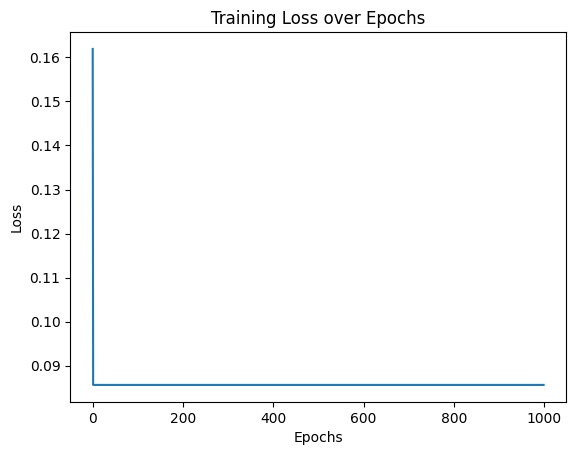

In [37]:
# Veštački generisani podaci
np.random.seed(42)
inputs = np.random.rand(1000, 2)
targets = (inputs[:, 0] + inputs[:, 1]).reshape(-1, 1)

# Inicijalizacija i postavka arhitekture mreže
input_size = 2 # jer imamo dve ulazne vrednosti, primetite imputs je dimenzije 2
hidden_size = 4 # jedan skriveni sloj sa 4 neurona, probajte samostalno da napravite sa više slojeva
output_size = 1 # jer je izlaz, target jedna vrednost
learning_rate = 0.1
epochs = 1000


# Pravljenje same mreže
model = NeuralNetwork(input_size, hidden_size, output_size)
# Treniranje, tj. obuka prethodno napravljanje mreže
loss_history = model.train(inputs, targets, epochs, learning_rate)

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

Neuronske mreže se mogu koristiti i za **regresiju**, tj. za učenje funkcije koja mapira ulazne vrednosti na **kontinualan (numerički) izlaz**. Cilj je da mreža kroz podešavanje težina i biasa nauči odnos u podacima tako da predikcije što manje odstupaju od stvarnih vrednosti.

U tom slučaju, ulazni podaci prolaze kroz slojeve mreže (feedforward), a **izlazni sloj** obično koristi *linearnu aktivaciju* (ili nema aktivaciju), jer nam treba realna vrednost, ne klasa. Dobijena predikcija $\hat{y}$ se zatim poredi sa stvarnom vrednošću $y$ pomoću funkcije gubitka, najčešće **Mean Squared Error (MSE)**, i obuka minimizuje tu grešku (npr. gradijentnim spustom i backpropagation-om).

Regresija neuronskim mrežama se koristi kada želimo da predviđamo kontinuirane veličine, na primer cenu nekretnine, potrošnju, temperaturu, ili vrednosti vremenskih serija.

U nastavku prikazujemo primer primene neuronske mreže koja treba da modeluje ponašanje funkcije

$y=4+3x$.

Epoch 0, Loss: 0.6774019282635695
Epoch 100, Loss: 0.333720284751222
Epoch 200, Loss: 0.30321303519228215
Epoch 300, Loss: 0.2968955428414361
Epoch 400, Loss: 0.29439091799265243


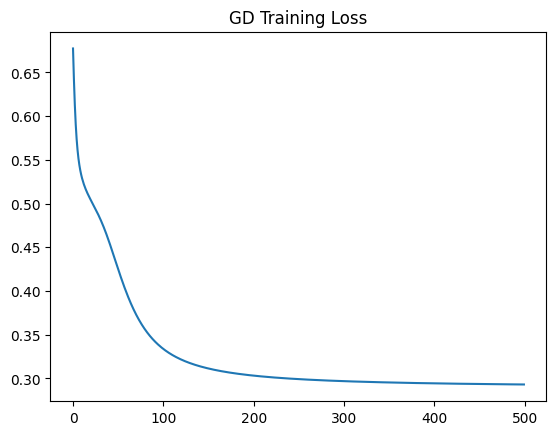

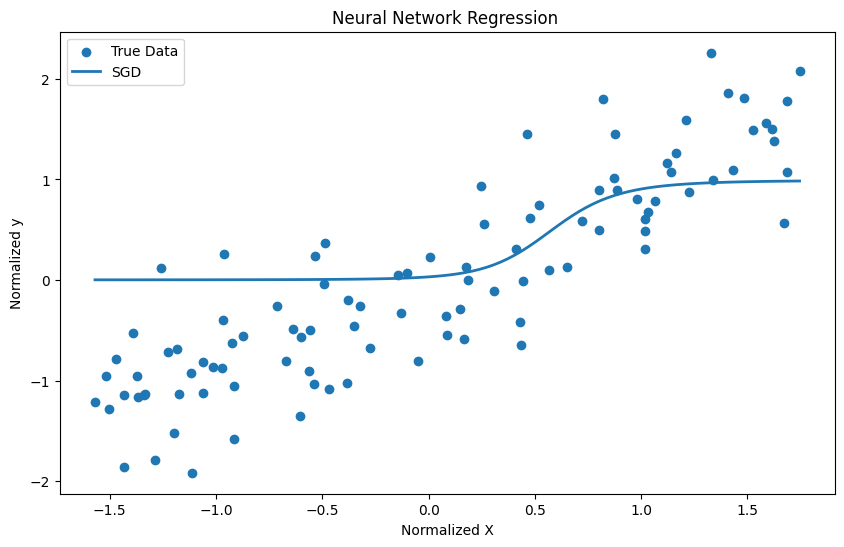

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Podatke veštački generišemo, uzmemo neke vrednosti za x,
# Izračunamo kolika bi bila vrednost izlaza iz funcije za te vrednosti i dodamo malo "šuma" na to
# sa np.random.randn --> Generisali smo podatke čiji trend liči na željenu funkciju.

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Normalizacija podataka
X_normalized = (X - X.mean()) / X.std()
y_normalized = (y - y.mean()) / y.std()

# Hiperparametri NN mreže, tj. parametri njene arhitekture
input_size = 1
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 500

# Pravljenje modela mreže
model = NeuralNetwork(input_size, hidden_size, output_size)
loss_history = model.train(X_normalized, y_normalized, epochs, learning_rate)


# Prikaz kako se menjala greška izlaza pri procesu obuke
plt.plot(loss_history)
plt.title('GD Training Loss')

plt.show()

# Testiranje mreže na podacima koje mreža "nije videla", tj. nad kojima nije trenirana
X_test = np.linspace(X_normalized.min(), X_normalized.max(), 100).reshape(-1, 1)
y_pred_gd = model.forward(X_test)


# Uporedni prikaz stvarnih izlaznih podataka i onoga što je mreža predvidjela
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized, y_normalized, label='True Data')
plt.plot(X_test, y_pred_gd, label='SGD', linewidth=2)

plt.title('Neural Network Regression ')
plt.xlabel('Normalized X')
plt.ylabel('Normalized y')
plt.legend()
plt.show()

## Klasifikacija pomoću neuronskih mreža

Klasifikacija pomoću neuronskih mreža se koristi kada je cilj da svakom ulaznom primeru dodelimo jednu od nekoliko **diskretnih klasa**. Mreža uči granicu odlučivanja u prostoru podataka na osnovu označenih primera, tako da za nove podatke može da predvidi kojoj klasi najverovatnije pripadaju.

Kod **binarne klasifikacije** (dve klase) izlazni sloj često ima **jedan neuron**. Njegov izlaz (najčešće posle sigmoid aktivacije) tumačimo kao verovatnoću klase 1, pa se odluka donosi poređenjem sa pragom (npr. 0.5).
Kod **višeklasne klasifikacije** (K klasa) izlazni sloj ima **K neurona** i svaki neuron odgovara jednoj klasi. U tom slučaju, mreža na izlazu tipično daje raspodelu verovatnoća po klasama.

Da bismo dobili verovatnoće u višeklasnom slučaju koristi se **softmax** aktivacija. Ako su $z_i$ izlazi (logiti) i-tog neurona na izlaznom sloju, softmax je:

\begin{align}
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
\end{align}

Softmax ima dve važne osobine:
- svaka vrednost je u intervalu $(0,1)$,
- zbir svih izlaza je 1, pa se mogu tumačiti kao verovatnoće pripadnosti klasama.

Predikcija klase se najčešće dobija kao indeks najveće verovatnoće:
\begin{align}
\hat{k} = \arg\max_k \ \hat{y}_k
\end{align}

Da bi mreža učila, potrebna je funkcija gubitka koja kažnjava pogrešne predikcije. Za klasifikaciju se standardno koristi **Cross-Entropy Loss**, jer direktno meri koliko se predviđena raspodela verovatnoća razlikuje od tačne klase. Za skup od $N$ primera i $K$ klasa:

\begin{align}
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik}\log(\hat{y}_{ik})
\end{align}

gde su:
- $y_{ik}$ tačna oznaka: obično je $1$ za pravu klasu, a $0$ za ostale,
- $\hat{y}_{ik}$ predikcija mreže (softmax verovatnoća) da i-ti primer pripada klasi $k$,
- $K$ broj klasa, $N$ broj uzoraka.

Ako mreža dodeli visoku verovatnoću tačnoj klasi, gubitak je mali; ako dodeli nisku verovatnoću tačnoj klasi, gubitak je veliki. Tokom treninga, backpropagation i optimizator (npr. SGD ili Adam) prilagođavaju težine tako da se ovaj gubitak minimizuje.

Ovakav pristup se koristi u zadacima kao što su prepoznavanje slika, klasifikacija teksta (npr. sentiment), detekcija spama i generalno razvrstavanje podataka u diskretne kategorije.

Primenu neuronskih mreža u klasifikaciji demonstriraćemo na jednostavnom primeru: klasifikaciji brojeva prema tome da li su **veći ili jednaki proseku** skupa ili su **manji od proseka**. Pošto postoje dve klase, ovo je problem **binarne klasifikacije**.

**Zadatak: Klasifikacija brojeva u odnosu na prosek**

Cilj je da svaki broj iz skupa dodelimo jednoj od dve klase na osnovu njegove vrednosti u odnosu na prosek celog skupa.

1. **Generisanje podataka**
   Generišemo niz brojeva od 1 do 1000.

2. **Formiranje klasa (labela)**
   Računamo prosek skupa brojeva, a zatim svaki broj klasifikujemo kao:
   - **Klasa 1**: ako je broj veći ili jednak proseku skupa brojeva,
   - **Klasa 0**: ako je broj manji od proseka skupa brojeva.

3. **Podela podataka**
   Podatke delimo na dva skupa:
   - skup za obuku (70% podataka),
   - skup za testiranje (30% podataka).

4. **Treniranje modela**
   Koristimo jednostavnu neuronsku mrežu sa jednim skrivenim slojem za obučavanje modela.

5. **Evaluacija**
   Procenjujemo tačnost modela na test skupu i ispisujemo koji su brojevi klasifikovani kao „veći ili jednak proseku“, a koji kao „manji od proseka“.

**Potrebno je:**
- Implementirati model za klasifikaciju.
- Izračunati i ispisati tačnost modela na testnim podacima.
- Ispisati koji brojevi su klasifikovani kao „veći ili jednak proseku“, a koji kao „manji od proseka“.
- Ispitati kako različite postavke modela (broj neurona u skrivenom sloju, broj epoha, veličina skupa podataka) utiču na tačnost klasifikacije.


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Aktivaciona funkcija
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Sprečavanje log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Klasa za neuronsku mrežu
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.biases_output = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_output
        self.output = sigmoid(self.output_input)

        return self.output

    def backward(self, X, y, learning_rate):
        output_error = self.output - y
        output_delta = output_error * sigmoid_derivative(self.output_input)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_input)

        # OVDE JE PRIMENJEN KLASIČNI GRADIJENTNI ALGORITAM ZA UPDATE TEŽINA I BIJASA ZA SVE SLOJEVE!
        self.weights_hidden_output -= np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.biases_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden -= np.dot(X.T, hidden_delta) * learning_rate
        self.biases_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = cross_entropy_loss(y, y_pred)
            loss_history.append(loss)

            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return loss_history

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)  # Predikcija 0 ili 1

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generišemo 1D podatke
X = np.array([i for i in range(1, 1001)])  # Brojevi od 1 do 1000
y = np.array([1 if i >= np.mean(X) else 0 for i in X])  # Klasifikacija: 1 ako je broj >= prosek, 0 ako nije

# Podelimo podatke na obučavajući i testni skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state=42, da bismo pri svakom pokretanju koda imali istu podelu podataka

# Preoblikujemo (1D podaci treba da budu u formi [n_samples, n_features])
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Normalizacija podataka (opseg [0, 1])
min_value = np.min(X_train)
max_value = np.max(X_train)
X_train_normalized = (X_train - min_value) / (max_value - min_value)
X_test_normalized = (X_test - min_value) / (max_value - min_value)

# Kreiramo i obučavamo model (smanjeni broj neurona i epoha)
model = NeuralNetwork(input_size=1, hidden_size=5, output_size=1)
epochs = 2000
learning_rate = 0.1
loss_history = model.train(X_train_normalized, y_train.reshape(-1, 1), epochs, learning_rate)

# Predikcija na test skupu
y_pred = model.predict(X_test_normalized)

# Ispis rezultata
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Ispisujemo prosek i kako su brojevi klasifikovani
mean_value = np.mean(X)
print(f"Prosek (mean) skupa podataka: {mean_value}")

# Ispisujemo koje brojeve je model klasifikovao kao "Veći ili jednak proseku"
for i, pred in zip(X_test.flatten(), y_pred):
    if pred == 1:
        print(f"Broj {i} je Veći ili jednak proseku")
    else:
        print(f"Broj {i} je Manji od proseka")

Epoch 0, Loss: 0.3491
Epoch 100, Loss: 0.0106
Epoch 200, Loss: 0.0089
Epoch 300, Loss: 0.0074
Epoch 400, Loss: 0.0064
Epoch 500, Loss: 0.0056
Epoch 600, Loss: 0.0051
Epoch 700, Loss: 0.0047
Epoch 800, Loss: 0.0043
Epoch 900, Loss: 0.0040
Epoch 1000, Loss: 0.0038
Epoch 1100, Loss: 0.0036
Epoch 1200, Loss: 0.0034
Epoch 1300, Loss: 0.0032
Epoch 1400, Loss: 0.0031
Epoch 1500, Loss: 0.0029
Epoch 1600, Loss: 0.0028
Epoch 1700, Loss: 0.0027
Epoch 1800, Loss: 0.0026
Epoch 1900, Loss: 0.0025
Test Accuracy: 98.33%
Prosek (mean) skupa podataka: 500.5
Broj 522 je Veći ili jednak proseku
Broj 738 je Veći ili jednak proseku
Broj 741 je Veći ili jednak proseku
Broj 661 je Veći ili jednak proseku
Broj 412 je Manji od proseka
Broj 679 je Veći ili jednak proseku
Broj 627 je Veći ili jednak proseku
Broj 514 je Veći ili jednak proseku
Broj 860 je Veći ili jednak proseku
Broj 137 je Manji od proseka
Broj 812 je Veći ili jednak proseku
Broj 77 je Manji od proseka
Broj 637 je Veći ili jednak proseku
Broj 974

# Obratiti pažnju

Probajte da rešite problem tako što ćete menjati **arhitekturu mreže** i pratiti kako to utiče na rezultat. Konkretno, umesto jednog skrivenog sloja, napravite mrežu sa **dva skrivena sloja** (npr. prvi sloj 3 neurona, drugi 4 neurona). U kodu to znači da posle prvog sloja (težine + bias + aktivacija) dodate još jedan isti takav blok, pa tek onda izlazni sloj. Trening i evaluacija ostaju isti, samo se menja forward pass (i broj parametara koje učite).

Uticaj **aktivacionih funkcija** testirate tako što u skrivenim slojevima zamenite funkciju $f(\cdot)$ (npr. ReLU, tanh, sigmoid, leaky ReLU), dok izlazni sloj ostaje prema zadatku: za binarnu klasifikaciju tipično sigmoid/step, za višeklasnu softmax, za regresiju linearna aktivacija. U praksi: promenite poziv aktivacije u forward pass-u i obavezno koristite odgovarajuću derivaciju u backprop-u (ako ručno računate gradijente). Zatim uporedite loss i tačnost: ReLU često uči brže, tanh može biti stabilniji oko nule, sigmoid je sklon zasićenju (sporiji gradijenti).

Različite **gradijentne algoritme (optimizatore)** implementirate tako što menjate deo koda gde se rade ažuriranja parametara. Umesto osnovnog pravila:

\begin{align}
w \leftarrow w - \gamma \frac{\partial E}{\partial w}, \qquad
b \leftarrow b - \gamma \frac{\partial E}{\partial b},
\end{align}

ubacite odgovarajuću logiku:

- **Momentum:** pamtite brzinu $v$ po parametru i ažurirate $v \leftarrow \omega v + \gamma \nabla E$, pa $w \leftarrow w - v$.
- **Nesterov:** prvo napravite „look-ahead“ pomeraj pomoću $\omega v$, pa gradijent računajte u toj tački i onda ažurirajte kao momentum.
- **AdaGrad:** za svaku težinu vodite sumu kvadrata gradijenata $G \leftarrow G + g^2$ i koristite korak $\gamma / \sqrt{G+\varepsilon}$.
- **RMSProp:** umesto sume, vodite eksponencijalni prosek $G \leftarrow \omega G + (1-\omega)g^2$.
- **Adam:** kombinujete pokretni prosek gradijenata $m$ i kvadrata $v$ uz bias-correction, pa korak postaje $\gamma \hat{m}/(\sqrt{\hat{v}}+\varepsilon)$.

Parametri tipično znače: $\gamma$ stopa učenja (veličina koraka), $\omega$ faktor „pamćenja“ kod momenta/RMSProp, $\beta_1,\beta_2$ faktori „pamćenja“ kod Adam-a, $\varepsilon$ broj za stabilnost (da se ne deli nulom).

Ako treba da generišete podatke za obuku iz zadate funkcije (koja nije nužno jednodimenziona), postupak je uvek isti:
1) izaberete ulaze $\mathbf{x}$ (nasumično ili kao mrežu tačaka) u nekom opsegu,
2) izračunate izlaz $y = f(\mathbf{x})$.

Za 2D funkciju to znači da generišete parove $(x_1, x_2)$, pa računате $y=f(x_1,x_2)$. Ako je u pitanju klasifikacija, onda iz $y$ pravite labelu (npr. $y \ge \text{prag} \Rightarrow 1$ inače 0). Ako je regresija, $y$ ostaje realna vrednost. Zatim podatke podelite na train/test, po potrebi normalizujete ulaze i trenirate mrežu.

Ukratko: promene arhitekture i aktivacija rešavaju se menjom forward dela mreže; promene optimizatora rešavaju se menjanjem dela gde se parametri ažuriraju; generisanje podataka se rešava tako što sami napravite ulaze i iz funkcije izračunate izlaz/labelu.
